In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class HyperXActivation(nn.Module):
    """
    PyTorch implementation of the HyperX Activation Function: x * tanh(kx)
    """
    def __init__(self, k=1.0):
        super(HyperXActivation, self).__init__()
        self.k = k

    def forward(self, x):
        """
        Forward pass of the activation function.
        
        Parameters:
            x (torch.Tensor): Input tensor.
        
        Returns:
            torch.Tensor: Output of the activation function.
        """
        return x * torch.tanh(self.k * x)


In [3]:
import torch
# from src.pytorch_impl import HyperXActivation

# Example usage
x = torch.tensor([0.0, 0.5, 1.0, -0.5, -1.0], dtype=torch.float32)
k = 2.0
activation = HyperXActivation(k=k)
output = activation(x)
print("PyTorch HyperX Output:", output)


PyTorch HyperX Output: tensor([0.0000, 0.3808, 0.9640, 0.3808, 0.9640])


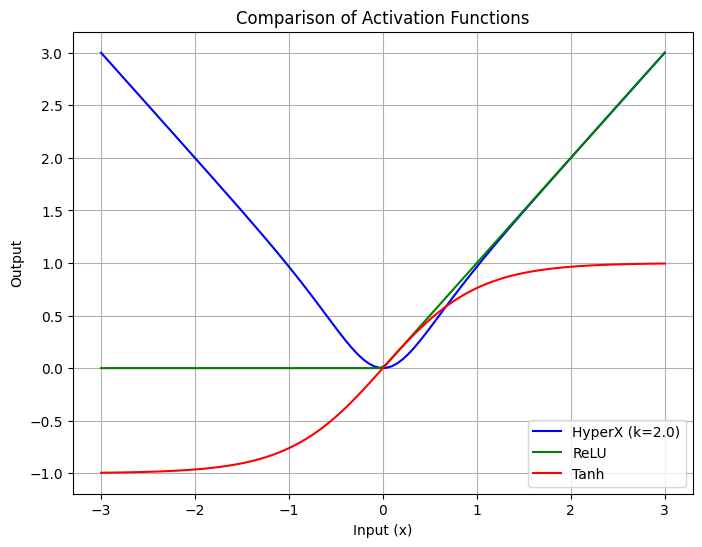

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Custom HyperX Activation Function
class HyperXActivation(nn.Module):
    def __init__(self, k=1.0):
        super(HyperXActivation, self).__init__()
        self.k = k

    def forward(self, x):
        return x * torch.tanh(self.k * x)

# Activation Functions
hyperx = HyperXActivation(k=2.0)
relu = nn.ReLU()
tanh = nn.Tanh()

# Input Range
x = torch.linspace(-3, 3, 100)

# Compute Outputs
y_hyperx = hyperx(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plot the Activation Functions
plt.figure(figsize=(8, 6))
plt.plot(x, y_hyperx, label='HyperX (k=2.0)', color='blue')
plt.plot(x, y_relu, label='ReLU', color='green')
plt.plot(x, y_tanh, label='Tanh', color='red')
plt.title("Comparison of Activation Functions")
plt.xlabel("Input (x)")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

import time

# Custom HyperX Activation
class HyperXActivation(nn.Module):
    def __init__(self, k=1.0):
        super(HyperXActivation, self).__init__()
        self.k = k

    def forward(self, x):
        return x * torch.tanh(self.k * x)

# Neural Network Model
class SimpleNet(nn.Module):
    def __init__(self, activation_fn):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.activation_fn = activation_fn

    def forward(self, x):
        x = self.flatten(x)
        x = self.activation_fn(self.fc1(x))
        x = self.activation_fn(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

# Load MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=True, transform=transform), batch_size=64, shuffle=False)

# Training Function
def train_and_evaluate(activation_fn, name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = SimpleNet(activation_fn).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.NLLLoss()
    
    # Training
    start_time = time.time()
    for epoch in range(1, 6):  # 5 epochs
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch} - Loss: {loss.item():.4f}")
    
    end_time = time.time()
    training_time = end_time - start_time

    # Evaluation
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
    
    accuracy = correct / len(test_loader.dataset)
    print(f"{name} Accuracy: {accuracy:.4f}, Training Time: {training_time:.2f} seconds")
    return accuracy, training_time

# Benchmarking HyperX, ReLU, and Tanh
results = {}
results['HyperX'] = train_and_evaluate(HyperXActivation(k=2.0), "HyperX")
results['ReLU'] = train_and_evaluate(nn.ReLU(), "ReLU")
results['Tanh'] = train_and_evaluate(nn.Tanh(), "Tanh")




Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw

Epoch 1 - Loss: 0.4691
Epoch 2 - Loss: 0.0440
Epoch 3 - Loss: 0.0662
Epoch 4 - Loss: 0.1561
Epoch 5 - Loss: 0.0274
HyperX Accuracy: 0.9730, Training Time: 59.68 seconds
Epoch 1 - Loss: 0.4581
Epoch 2 - Loss: 0.0562
Epoch 3 - Loss: 0.0790
Epoch 4 - Loss: 0.0336
Epoch 5 - Loss: 0.0394
ReLU Accuracy: 0.9662, Training Time: 60.10 seconds
Epoch 1 - Loss: 0.1464
Epoch 2 - Loss: 0.3118
Epoch 3 - Loss: 0.0860
Epoch 4 - Loss: 0.2451
Epoch 5 - Loss: 0.1466
Tanh Accuracy: 0.9643, Training Time: 59.55 seconds


# **CIFAR-10**

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# Define HyperX Activation Function
class HyperXActivation(nn.Module):
    def __init__(self, k=1.0):
        super(HyperXActivation, self).__init__()
        self.k = k

    def forward(self, x):
        return x * torch.tanh(self.k * x)

# Define the CNN Model with HyperX Activation
class CNNWithHyperX(nn.Module):
    def __init__(self, activation=nn.ReLU(), k=1.0):
        super(CNNWithHyperX, self).__init__()
        self.activation = activation if not isinstance(activation, str) else HyperXActivation(k=k)
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # CIFAR-10 has 3 channels
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(self.activation(self.bn1(self.conv1(x))))
        x = self.pool(self.activation(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 8 * 8)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# Load CIFAR-10 Data
def load_cifar10(batch_size=64):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return trainloader, testloader

# Training Function
def train_model(model, trainloader, criterion, optimizer, device, epochs=5):
    model.train()
    start_time = time.time()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")
    end_time = time.time()
    print(f"Training Time: {end_time - start_time:.2f} seconds")

# Test Function
def test_model(model, testloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

# Main Function to Run Experiments
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)

    # Load data
    trainloader, testloader = load_cifar10()

    # Define loss function and hyperparameters
    criterion = nn.CrossEntropyLoss()
    epochs = 5

    # Experiment with HyperX
    print("\nTraining with HyperX Activation (k=2.0):")
    model_hyperx = CNNWithHyperX(activation="HyperX", k=2.0).to(device)
    optimizer_hyperx = optim.Adam(model_hyperx.parameters(), lr=0.001)
    train_model(model_hyperx, trainloader, criterion, optimizer_hyperx, device, epochs)
    test_model(model_hyperx, testloader, device)

    # Experiment with ReLU
    print("\nTraining with ReLU Activation:")
    model_relu = CNNWithHyperX(activation=nn.ReLU()).to(device)
    optimizer_relu = optim.Adam(model_relu.parameters(), lr=0.001)
    train_model(model_relu, trainloader, criterion, optimizer_relu, device, epochs)
    test_model(model_relu, testloader, device)

    # Experiment with Tanh
    print("\nTraining with Tanh Activation:")
    model_tanh = CNNWithHyperX(activation=nn.Tanh()).to(device)
    optimizer_tanh = optim.Adam(model_tanh.parameters(), lr=0.001)
    train_model(model_tanh, trainloader, criterion, optimizer_tanh, device, epochs)
    test_model(model_tanh, testloader, device)

if __name__ == "__main__":
    main()


Using device: cpu


100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified

Training with HyperX Activation (k=2.0):
Epoch 1, Loss: 1.6080
Epoch 2, Loss: 1.0272
Epoch 3, Loss: 0.8589
Epoch 4, Loss: 0.7795
Epoch 5, Loss: 0.7188
Training Time: 568.13 seconds
Test Accuracy: 68.83%

Training with ReLU Activation:
Epoch 1, Loss: 1.2321
Epoch 2, Loss: 0.9200
Epoch 3, Loss: 0.8178
Epoch 4, Loss: 0.7477
Epoch 5, Loss: 0.6824
Training Time: 380.86 seconds
Test Accuracy: 71.55%

Training with Tanh Activation:
Epoch 1, Loss: 1.3616
Epoch 2, Loss: 1.0784
Epoch 3, Loss: 0.9534
Epoch 4, Loss: 0.8636
Epoch 5, Loss: 0.7934
Training Time: 429.14 seconds
Test Accuracy: 68.22%


In [14]:
import torchvision.models as models

# Modify ResNet18 to use HyperX
class ResNetWithHyperX(nn.Module):
    def __init__(self, k=2.0):
        super(ResNetWithHyperX, self).__init__()
        self.model = models.resnet18(pretrained=False)
        self.k = k
        self._replace_relu_with_hyperx(self.model)

    def _replace_relu_with_hyperx(self, module):
        for name, child in module.named_children():
            if isinstance(child, nn.ReLU):
                setattr(module, name, HyperXActivation(k=self.k))
            else:
                self._replace_relu_with_hyperx(child)

    def forward(self, x):
        return self.model(x)

# Train and test with ResNet18
print("\nTraining ResNet18 with HyperX Activation:")
model_resnet_hyperx = ResNetWithHyperX(k=2.0).to(device)
optimizer_resnet_hyperx = optim.Adam(model_resnet_hyperx.parameters(), lr=0.001)
train_model(model_resnet_hyperx, trainloader, criterion, optimizer_resnet_hyperx, device, epochs)
test_model(model_resnet_hyperx, testloader, device)



Training ResNet18 with HyperX Activation:


c:\Users\Gaurav\OneDrive\Desktop\HyperX\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Gaurav\OneDrive\Desktop\HyperX\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


NameError: name 'device' is not defined

# **HyperX after some changes**

In [1]:
import torch
import torch.nn as nn

class HyperXActivation(nn.Module):
    """
    PyTorch implementation of the HyperX Activation Function: x * tanh(kx).
    """
    def __init__(self, k=1.0):
        super(HyperXActivation, self).__init__()
        self.k = nn.Parameter(torch.tensor(k, dtype=torch.float32), requires_grad=False)

    def forward(self, x):
        """
        Forward pass of the activation function.
        
        Parameters:
            x (torch.Tensor): Input tensor.
        
        Returns:
            torch.Tensor: Output tensor after applying activation.
        """
        return x * torch.tanh(self.k * x)

    def set_k(self, new_k):
        """
        Updates the scaling factor k.
        
        Parameters:
            new_k (float): New value for the scaling factor k.
        """
        self.k.data = torch.tensor(new_k, dtype=torch.float32)


In [2]:
# Initialize the activation with k=1.0
activation = HyperXActivation(k=1.0)

# Apply the activation to some tensor
x = torch.tensor([1.0, 2.0, -3.0], dtype=torch.float32)
output = activation(x)
print("Output:", output)

# Change the value of k dynamically
activation.set_k(2.0)
output_new = activation(x)
print("Output with new k:", output_new)


Output: tensor([0.7616, 1.9281, 2.9852])
Output with new k: tensor([0.9640, 1.9987, 3.0000])


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the HyperX Activation Function class
class HyperXActivation(nn.Module):
    def __init__(self, k=1.0):
        super(HyperXActivation, self).__init__()
        self.k = nn.Parameter(torch.tensor(k, dtype=torch.float32), requires_grad=False)

    def forward(self, x):
        return x * torch.tanh(self.k * x)

    def set_k(self, new_k):
        self.k.data = torch.tensor(new_k, dtype=torch.float32)

# Define a simple NN using HyperX activation
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.activation = activation
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

# Instantiate the activation and model
activation = HyperXActivation(k=1.0)
model = SimpleNN(input_dim=2, hidden_dim=32, output_dim=1, activation=activation)

# Generate synthetic data for training
X = torch.randn(1000, 2)
y = X.sum(dim=1, keepdim=True) + torch.randn(1000, 1)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(5):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X)
    loss = criterion(outputs, y)
print(f"PyTorch Model - Loss: {loss.item()}")


Epoch 1, Loss: 2.9720494747161865
Epoch 2, Loss: 2.9480338096618652
Epoch 3, Loss: 2.9243109226226807
Epoch 4, Loss: 2.9008851051330566
Epoch 5, Loss: 2.8777568340301514
PyTorch Model - Loss: 2.8549232482910156
